<a href="https://colab.research.google.com/github/srikalamunukutla/covid-classification/blob/main/Covid_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Biopython
from Bio import SeqIO
import numpy as np
import pandas as pd
from collections import Counter

#data_path = 'https://drive.google.com/uc?id=1PqupjbA0HYNs1fd1y6TAkkvZeMQ6kmK0'
cov2_vs_rtg13 = './SARS_CoV_2_vs_RTG13.fasta'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20DNA%20Detectives/SARS_CoV_2_vs_RTG13.fasta'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.4 MB/s eta 0:00:00
SARS_CoV_2_vs_RTG13 100%[===================>]  59.52K  --.-KB/s    in 0.09s   


In [4]:
# This fasta file consists of 2 genomes.
# First is of the first SARS-CoV-2 sequenced from Wuhan (NC_k43lj)
# as well as the genome of the bat coronavirus that researchers believe
# SARS-CoV-2 evolved from.
sequences = [record for record in
             SeqIO.parse(cov2_vs_rtg13,'fasta')]
sequence_bat = np.array(sequences[0])
sequence_cov2 = np.array(sequences[1])
virus = 'SARS-CoV-2' #@param ['bat coronavirus (RTG13)', 'SARS-CoV-2']
if virus=='SARS-CoV-2':
  print(sequences[1])
else:
  print(sequences[0])

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sequence_bat = np.array(sequences[0])
sequence_cov2 = np.array(sequences[1])
start =  0#@param {type:"integer"}
stop =  1049#@param {type:"integer"}
print("SARS-CoV-2:")
print(''.join(sequence_cov2[start:stop]))
print("bat coronavirus:")
print(''.join(sequence_bat[start:stop]))
print(sum(sequence_cov2[start:stop]!=sequence_bat[start:stop]),
      "bases differ.")

print(sequence_cov2[start:stop]!=sequence_bat[start:stop])

SARS-CoV-2:
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTAC

In [7]:
sequence_cov2

array(['A', 'T', 'T', ..., 'A', 'A', 'A'], dtype='<U1')

In [8]:
sequence_bat = np.array(sequences[0])
sequence_cov2 = np.array(sequences[1])

# Compute length, number of different bases,
# and number of the same bases.
length_cov2 = sum(sequence_cov2!='-')
n_bases_different = sum(sequence_bat!=sequence_cov2)
n_bases_same = sum(sequence_bat==sequence_cov2)

print("1. Length of SARS-CoV-2 genome: ", length_cov2)
print("2. Number of bases that differ: ",
      n_bases_different)
print("3. Percent similarity: %",
      100*n_bases_same/length_cov2)

1. Length of SARS-CoV-2 genome:  29903
2. Number of bases that differ:  1189
3. Percent similarity: % 96.02381032003478


In [9]:
sequence_bat = np.array(sequences[1])
sequence_cov2 = np.array(sequences[0])

num_A = sum(sequence_cov2=='A')
num_T = sum(sequence_cov2 == 'T')###### FILL IN ##### # Number of 'T' bases.
num_C = sum(sequence_cov2 == 'C')###### FILL IN ##### # Number of 'C' bases.
num_G = sum(sequence_cov2 == 'G')###### FILL IN ##### # Number of 'G' bases.
num_hypen = sum(sequence_cov2=='-')
print("Percent A: %", (100*num_A/length_cov2))
print("Percent T: %", (100*num_T/length_cov2))
print("Percent C: %", (100*num_C/length_cov2))
print("Percent G: %", (100*num_G/length_cov2))
print(num_hypen)

Percent A: % 29.85653613349831
Percent T: % 32.00682205798749
Percent C: % 18.426244858375412
Percent G: % 19.54987793866836
48


In [11]:
n_start_codons = 0
for i in range(len(sequence_cov2[:-3])):
  codon = ''.join(sequence_cov2[i:(i+3)])
  if codon == 'ATG':
    n_start_codons = n_start_codons + 1

print("Number of possible ATG start codons: ", n_start_codons)

Number of possible ATG start codons:  729


In [12]:
!pip install Biopython
from Bio import SeqIO
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn import model_selection, linear_model

# data_path = 'https://drive.google.com/uc?id=1f1CtRwSohB7uaAypn8iA4oqdXlD_xXL1'
# cov2_sequences = 'SARS_CoV_2_sequences_global.fasta'

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20DNA%20Detectives/SARS_CoV_2_sequences_global.fasta'
cov2_sequences = 'SARS_CoV_2_sequences_global.fasta'

SARS_CoV_2_sequence 100%[===================>]  44.77M  25.8MB/s    in 1.7s    


In [13]:
sequences = [r for r in SeqIO.parse(cov2_sequences, 'fasta')]
sequence_num =  1530#@param {type:"integer"}
print(sequences[sequence_num])

ID: MT358656
Name: MT358656
Description: MT358656 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/WA-UW-4281/2020| complete genome|USA
Number of features: 0
Seq('---------TTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...---')


In [14]:
n_sequences = len(sequences)
print("There are %.0f sequences" % n_sequences)

There are 1538 sequences


In [15]:
sequence_1 = np.array(sequences[0])
sequence_10 = np.array(sequences[9])
percent_similarity = 100*np.mean(sequence_1==sequence_10)
#percent_similarity = sum(sequence_1==sequence_10)/len(sequence_1)*100 # Alternate solution
print("Sequence 1 and 10 similarity: %", percent_similarity)

Sequence 1 and 10 similarity: % 99.9765909774939


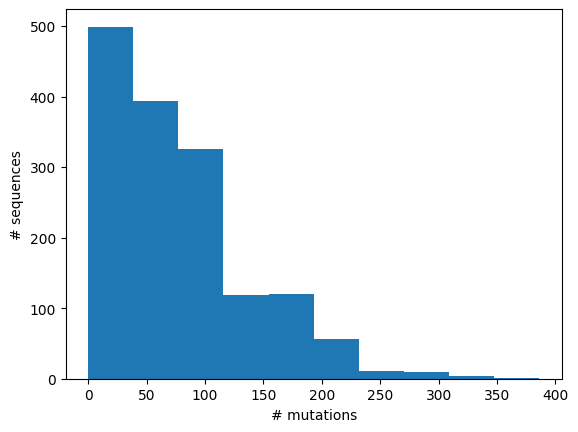

In [16]:
reference = np.array(sequences[0])
mutations_per_seq = np.array([sum(np.array(s) != reference) for s in sequences])

plt.hist(mutations_per_seq)
plt.xlabel('# mutations')
plt.ylabel('# sequences')
plt.show()

In [17]:
min_number_of_mutations  =  100#@param {type:"integer"}
idx = np.random.choice(np.where(mutations_per_seq>min_number_of_mutations)[0])
print("Sequence %i has > %.0f mutations! \n" % (idx, min_number_of_mutations))
print(sequences[idx], '\n')
print("The sequence is composed of: ")
Counter(np.array(sequences[idx]))

Sequence 949 has > 100 mutations! 

ID: MT370885
Name: MT370885
Description: MT370885 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/NY-PV08461/2020| complete genome|USA
Number of features: 0
Seq('------------------------------------------------------...---') 

The sequence is composed of: 


Counter({np.str_('-'): 177,
         np.str_('G'): 5840,
         np.str_('A'): 8874,
         np.str_('T'): 9553,
         np.str_('C'): 5459})

In [19]:
n_sequences_with_N = sum(['N' in s for s in sequences])
print('%i sequences have at least 1 "N"!' % n_sequences_with_N)

326 sequences have at least 1 "N"!


# Feature Extraction

In [20]:
#The features of the model will be the genomes of the different sequences. The labels will be the country that each sequence came from.
n_bases_in_seq = len(sequences[0])
columns = {}

# Iterate though all positions in this sequence.
for location in tqdm.tqdm(range(n_bases_in_seq)): # tqdm is a nice library that prints our progress.
  bases_at_location = np.array([s[location] for s in sequences])
  # If there are no mutations at this position, move on.
  if len(set(bases_at_location))==1: continue
  for base in ['A', 'T', 'G', 'C', '-']:
    feature_values = (bases_at_location==base)

    # Set the values of any base that equals 'N' to np.nan.
    feature_values[bases_at_location==['N']] = np.nan

    # Convert from T/F to 0/1.
    feature_values  = feature_values*1

    # Make the column name look like <location>_<base> (1_A, 2_G, 3_A, etc.)
    column_name = str(location) + '_' + base

    # Add column to dict
    columns[column_name] = feature_values


mutation_df = pd.DataFrame(columns)

# Print the size of the feature matrix/table.
n_rows = np.shape(mutation_df)[0]
n_columns = np.shape(mutation_df)[1]
print("Size of matrix: %i rows x %i columns" %(n_rows, n_columns))

# Check what the matrix looks like:
mutation_df.tail()

100%|██████████| 29903/29903 [02:12<00:00, 225.70it/s]


Size of matrix: 1538 rows x 12680 columns


,0_A,0_T,0_G,0_C,0_-,1_A,1_T,1_G,1_C,1_-,...,29901_A,29901_T,29901_G,29901_C,29901_-,29902_A,29902_T,29902_G,29902_C,29902_-
1533,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1534,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1535,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1536,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1537,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [22]:
country = "Viet Nam" #@param dict_keys(['China', 'Kazakhstan', 'India', 'Sri Lanka', 'Taiwan', 'Hong Kong', 'Viet Nam', 'Thailand', 'Nepal', 'Israel', 'South Korea', 'Iran', 'Pakistan', 'Turkey', 'Australia', 'USA']
countries = [(s.description).split('|')[-1] for s in sequences]
print("There are %i sequences from %s." %
      (Counter(countries)[country], country))

There are 2 sequences from Viet Nam.


In [23]:
countries_to_regions_dict = {
         'Australia': 'Oceania',
         'China': 'Asia',
         'Hong Kong': 'Asia',
         'India': 'Asia',
         'Nepal': 'Asia',
         'South Korea': 'Asia',
         'Sri Lanka': 'Asia',
         'Taiwan': 'Asia',
         'Thailand': 'Asia',
         'USA': 'North America',
         'Viet Nam': 'Asia'
}

regions = [countries_to_regions_dict[c] if c in
           countries_to_regions_dict else 'NA' for c in countries]
mutation_df['label'] = regions

In [24]:
region = "North America" #@param ['Oceania', 'North America', 'Asia']
print("There are %i sequences from %s." %
      (Counter(regions)[region], region))

There are 1215 sequences from North America.


In [25]:
balanced_df = mutation_df.copy()
balanced_df['label'] = regions
balanced_df = balanced_df[balanced_df.label!='NA']
balanced_df = balanced_df.drop_duplicates()
samples_north_america = balanced_df[balanced_df.label=='North America']
samples_oceania = balanced_df[balanced_df.label=='Oceania']
samples_asia = balanced_df[balanced_df.label=='Asia']

# Number of samples we will use from each region.
n = min(len(samples_north_america),
        len(samples_oceania),
        len(samples_asia))

balanced_df = pd.concat([samples_north_america[:n],
                    samples_asia[:n],
                    samples_oceania[:n]])
print("Number of samples in each region: ", Counter(balanced_df['label']))

Number of samples in each region:  Counter({'North America': 128, 'Asia': 128, 'Oceania': 128})


In [26]:
X = balanced_df.drop('label', axis=1)
Y = balanced_df.label
data = "X (features)" #@param ['X (features)', 'Y (label)']
start = 1 #@param {type:'integer'}
stop =  10#@param {type:'integer'}

if start>=stop:print("Start must be < stop!")
else:
  if data=='X (features)':
    print(X.iloc[start:stop])
  if data=='Y (label)':
    print(Y[start:stop])

     0_A  0_T  0_G  0_C  0_-  1_A  1_T  1_G  1_C  1_-  ...  29901_A  29901_T  \
323    1    0    0    0    0    0    1    0    0    0  ...        0        0   
324    0    0    1    0    0    0    1    0    0    0  ...        1        0   
325    1    0    0    0    0    0    1    0    0    0  ...        0        0   
326    1    0    0    0    0    0    1    0    0    0  ...        0        0   
327    0    0    1    0    0    0    1    0    0    0  ...        0        0   
328    1    0    0    0    0    0    1    0    0    0  ...        0        0   
329    1    0    0    0    0    0    1    0    0    0  ...        0        0   
330    1    0    0    0    0    0    1    0    0    0  ...        0        0   
331    1    0    0    0    0    0    1    0    0    0  ...        0        0   

     29901_G  29901_C  29901_-  29902_A  29902_T  29902_G  29902_C  29902_-  
323        0        0        1        0        0        0        0        1  
324        0        0        0        1    

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
lm = linear_model.LogisticRegression(
    multi_class="multinomial", max_iter=1000,
    fit_intercept=False, tol=0.001, solver='saga', random_state=42)

# Split into training/testing set.
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, train_size=.8)

# Train/fit model.
lm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(fit_intercept=False, max_iter=1000,
                   multi_class='multinomial', random_state=42, solver='saga',
                   tol=0.001)

In [34]:
# Predict on the test set.
y_pred = lm.predict(X_test)

# Compute accuracy.
accuracy = 100*np.mean(y_pred == y_test)
print("Accuracy: %", accuracy)

# Compute confusion matrix.
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_mat.columns = [c + ' predicted' for c in lm.classes_]
confusion_mat.index = [c + ' true' for c in lm.classes_]

print(confusion_mat)

Accuracy: % 96.1038961038961
                    Asia predicted  North America predicted  Oceania predicted
Asia true                       21                        0                  0
North America true               1                       22                  0
Oceania true                     1                        1                 31
